In [75]:
import pandas as pd

df = pd.read_csv("D:\\programs\\ai-ml-da\\pandas-learn\\datasets\\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<AxesSubplot:xlabel='Date'>

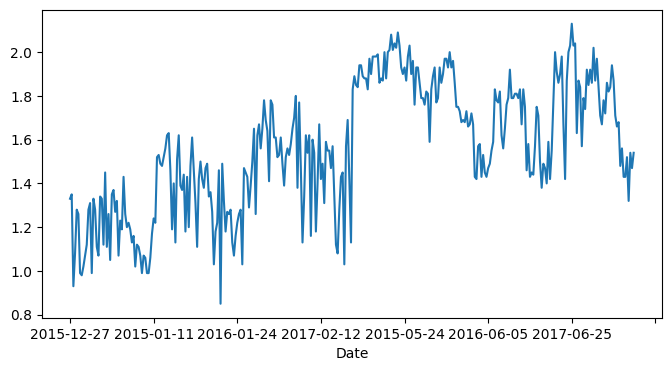

In [76]:
# let's create a constrainted dataframe
albany_df = df[ df["region"] == "Albany"]
albany_df.set_index("Date", inplace=True) # set the index
albany_df["AveragePrice"].plot(figsize=(8, 4))

# as we can see, THE DATES ARE NOT IN ORDER (pandas doesnt realize its a date)

<AxesSubplot:xlabel='Date'>

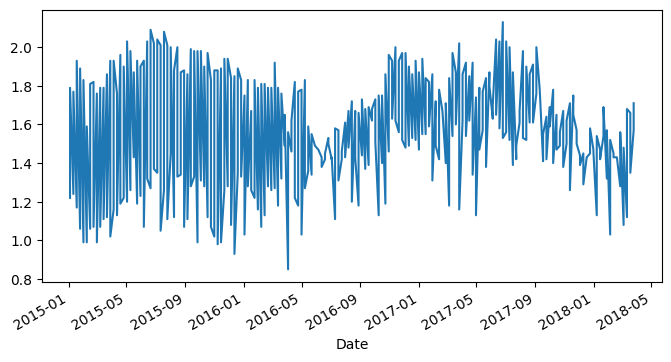

In [77]:
# to fix the issue of pandas not recognizing the "Date" col as a date field,
# we can reassign this column to be of type datetime

df["Date"] = pd.to_datetime(df["Date"]) # reassigning value as date/time type

# and just do normal stuff to plot
albany_df = df[ df["region"] == "Albany"]
albany_df.set_index("Date", inplace=True) # set the index
albany_df["AveragePrice"].plot(figsize=(8, 4))

# now somewhat better but still a bit crazy looking

<AxesSubplot:xlabel='Date'>

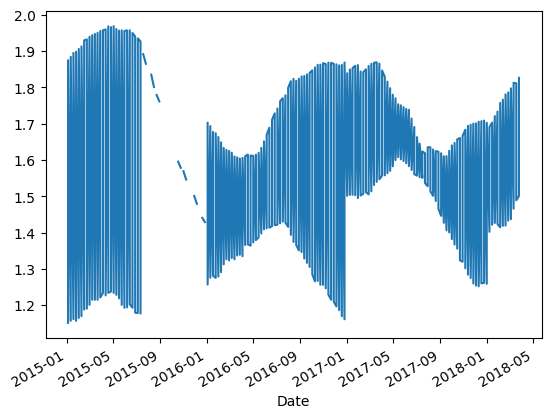

In [78]:
# let's smooth out the graph to make it look less crazier and nicer

# to do this we can use the Moving Average technique which is basically we select
#  X points , take the average of those X points (hence becoming just one point Y) then move to
#  to next X points over and do average again

albany_df["AveragePrice"].rolling(25).mean().plot()

# we can see that the graph does not look consistent, hence this graph is WRONG
# to fix this we can firstly try checking the order of data

In [79]:
# since our previous graph was wrong, we need to check the order of data

# lets check head
albany_df.head() # from getting first few items, Date looks ordered(descendingly) 
                    # (since we sort on Date)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [80]:
# let's check tail
albany_df.tail()

# also descendingly ordered, looks fine

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2018-02-04,7,1.52,4124.96,118.38,420.36,0.0,3586.22,3586.22,0.00,0.0,organic,2018,Albany
2018-01-28,8,1.32,6987.56,433.66,374.96,0.0,6178.94,6178.94,0.00,0.0,organic,2018,Albany
2018-01-21,9,1.54,3346.54,14.67,253.01,0.0,3078.86,3078.86,0.00,0.0,organic,2018,Albany
2018-01-14,10,1.47,4140.95,7.30,301.87,0.0,3831.78,3831.78,0.00,0.0,organic,2018,Albany
2018-01-07,11,1.54,4816.90,43.51,412.17,0.0,4361.22,4357.89,3.33,0.0,organic,2018,Albany


In [81]:
# so if the head() and tail() give us ordered data then something else is the issue

# let's try checking the index of the dataframe:  albany_df

albany_df.index

# now from the output below, we see our problem, although the dates FOR EACH YEAR
#  are reverse chronological order the years themselves are INCREASING  
#  e.g. 2015-MM-DD, ..., 2015 <-> MM - X <-> DD - Y (decreasing)
#  but 2015, ...., 2018 (increasing)

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

In [82]:
# so to fix this date order issue we can SORT THE INDEX
albany_df.sort_index(inplace=True)

# we get a warning here (due to inplace=True)
#  but we can carry on

C:\Users\zayaa\AppData\Local\Temp\ipykernel_8944\1375988463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df.sort_index(inplace=True)


<AxesSubplot:xlabel='Date'>

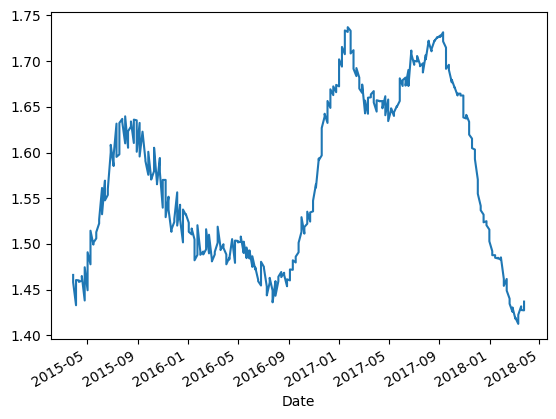

In [83]:
albany_df["AveragePrice"].rolling(25).mean().plot()
# now we can see from the graph below, we get a nicer graph that actually has the correct order
#   and makes more sense to read (based on mean of each 25 points)

In [84]:
# what if we want the moving average of AveragePrice to be a column?
# albany_df["AveragePrice"].rolling(25).mean()

albany_df["PricePer25MA"] =  albany_df["AveragePrice"].rolling(25).mean()
# we get another warning

C:\Users\zayaa\AppData\Local\Temp\ipykernel_8944\223920589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df["PricePer25MA"] =  albany_df["AveragePrice"].rolling(25).mean()


In [85]:
albany_df.head()

# as we can see, we have our new column "PricePer25MA" (price per moving average of 25) at the end
# of the DF

# some rows in "PricePer25MA" are NaN because they require 25 date points to calculate but 
#   dataframe may have less or none at all (we can fix this through min periods)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PricePer25MA
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany,NaN
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,NaN


In [86]:
# but if we do .tail()
albany_df.tail()
# we can see we actually have values

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PricePer25MA
Date,,,,,,,,,,,,,,
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany,1.4224
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany,1.4316
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [87]:
# ALTERNATIVELY, we can do .dropna() function to remove any N/A values for col/dataframe
albany_df.dropna()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PricePer25MA
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.00,organic,2018,Albany,1.4224
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.00,organic,2018,Albany,1.4316
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2018,Albany,1.4276


In [88]:
# and if we do
albany_df.dropna().head(3)
# we get first 3 records with NON N/A results 


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PricePer25MA
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328


In [89]:
# NOTE: 
# if we did:
albany_df.dropna()
albany_df.head()

# it would still return n/a for some records as here we are not 
# reassigning albany_df to remove n/a values

# so then in that case we can do:
albany_df.dropna(inplace=True)
albany_df.head()

# and it removes NaN or n/a

# however we get the SettingWithCopyWarning as we also previously got, so what is this?

C:\Users\zayaa\AppData\Local\Temp\ipykernel_8944\2873923794.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df.dropna(inplace=True)


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PricePer25MA
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600


In [90]:
# the SettingWithCopyWarning is a WARNING and NOT an ERROR, 
#     and basically just tells us that JUST TO BE SAFE, we should
#         perform operations ON A COPY of a data frame and not just the actual dataframe

# to fix this we can use .copy(@params optional) 
albany_df = df.copy()[ df["region"] == "Albany"] # create copy of df called albany_df 
                                                    # where region is "Albany"

# now we can just do our normal operations:
albany_df.set_index("Date", inplace=True)
albany_df.sort_index(inplace=True)
albany_df["PricePer25MA"] = albany_df["AveragePrice"].rolling(25).mean() # creating sub df

albany_df.dropna(inplace=True)
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PricePer25MA
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600


<AxesSubplot:xlabel='Date'>

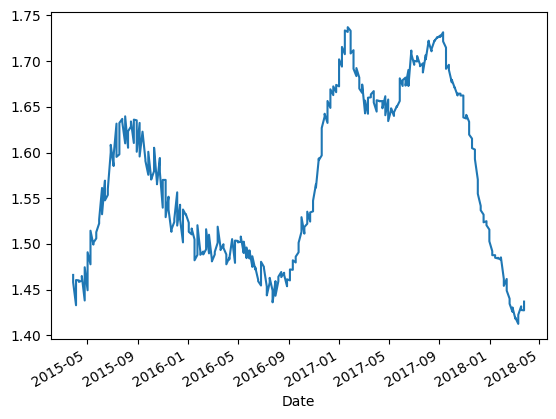

In [91]:
albany_df["PricePer25MA"].plot() # replotting column "PricePer25MA" (with copy made)

In [92]:
# we can get each row as an array
df.values

array([[0, Timestamp('2015-12-27 00:00:00'), 1.33, ..., 'conventional',
        2015, 'Albany'],
       [1, Timestamp('2015-12-20 00:00:00'), 1.35, ..., 'conventional',
        2015, 'Albany'],
       [2, Timestamp('2015-12-13 00:00:00'), 0.93, ..., 'conventional',
        2015, 'Albany'],
       ...,
       [9, Timestamp('2018-01-21 00:00:00'), 1.87, ..., 'organic', 2018,
        'WestTexNewMexico'],
       [10, Timestamp('2018-01-14 00:00:00'), 1.93, ..., 'organic', 2018,
        'WestTexNewMexico'],
       [11, Timestamp('2018-01-07 00:00:00'), 1.62, ..., 'organic', 2018,
        'WestTexNewMexico']], dtype=object)

In [93]:
# get field attributes as list
df["region"].values.tolist()

# but as we can see, we have duplicates 

['Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlant

In [94]:
# hence we can use .set() function to get unique values only

set(df["region"].values.tolist()) # now we have unique vals for column "region"

{'Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico'}

In [95]:
# to make sure it's actually a list, we can use list()
list(set(df["region"].values.tolist()))

# now we can do anything when we convert to list, e.g. iterate over it 


['Chicago',
 'Syracuse',
 'Indianapolis',
 'Boston',
 'Nashville',
 'Portland',
 'Northeast',
 'RaleighGreensboro',
 'Roanoke',
 'NorthernNewEngland',
 'Seattle',
 'SouthCentral',
 'Louisville',
 'MiamiFtLauderdale',
 'Boise',
 'Houston',
 'Charlotte',
 'Midsouth',
 'HartfordSpringfield',
 'HarrisburgScranton',
 'Tampa',
 'West',
 'GreatLakes',
 'Philadelphia',
 'LosAngeles',
 'Orlando',
 'WestTexNewMexico',
 'Albany',
 'Denver',
 'SanFrancisco',
 'CincinnatiDayton',
 'StLouis',
 'NewYork',
 'TotalUS',
 'SanDiego',
 'Spokane',
 'GrandRapids',
 'PhoenixTucson',
 'DallasFtWorth',
 'NewOrleansMobile',
 'Atlanta',
 'RichmondNorfolk',
 'LasVegas',
 'Sacramento',
 'BuffaloRochester',
 'California',
 'Plains',
 'SouthCarolina',
 'Columbus',
 'Detroit',
 'Pittsburgh',
 'Southeast',
 'Jacksonville',
 'BaltimoreWashington']

In [96]:
# another way of making the array of values unique
df["region"].unique()
# returns array of unique values for "region"

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [97]:
# example of turning data into list, and using it (e.g. assigning to variable and iteration)
v = list(set(df["region"].values.tolist())) # assigning to variable
v.sort()

# and now we can iterate over the list

for _ in range(len(v)):
        print(_, v)
# just returns the each index with list of sorted regions

0 ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']
1 ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'H

In [98]:
# graph_df = pd.DataFrame()

# for region in df['region'].unique():
#     # print(region)
#     region_df = df.copy()[df['region']==region]
#     region_df.set_index('Date', inplace=True)
#     region_df.sort_index(inplace=True)
#     region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

#     if graph_df.empty:
#         graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets!
#     else:
#         graph_df = graph_df.join(region_df[f"{region}_price25ma"])

# # graph_df.tail()

# ## bad performance, ABOVE CODE KILLS RAM  and each row has multiple duplicates dates when the dates should be unique

# # WHY?


# # Well, this is because upon anayzing the dataset more, we discover that the avocados have two types of pricing; ORGANIC and CONVENTIONAL 
# # hence we should now pick one and start over:

In [99]:
import pandas as pd

df = pd.read_csv("D:\\programs\\ai-ml-da\\pandas-learn\\datasets\\avocado.csv")
# set the dataframe to exclusively only allow for e.g. ORGANIC PRICED AVOCADOS
df = df.copy()[ df["type"] == "organic"]
df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.0,organic,2015,LasVegas
10893,51,2015-01-04,1.12,17296.85,14569.66,1868.59,0.00,858.60,830.00,28.60,0.0,organic,2015,PhoenixTucson
9437,51,2015-01-04,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.0,organic,2015,BuffaloRochester
11621,51,2015-01-04,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,2015,Spokane


In [100]:
# now recreate the graph_df Dataframe

graph_df = pd.DataFrame()

# for every region in df, make a separate df for each UNIQUE region
for region in df["region"].unique():
    # use the copy of df to avoid SettingWithCopyWarning
    region_df = df.copy()[ df["region"] == region]
    # set the index to be the Date
    region_df.set_index("Date", inplace=True)
    # then sort by Date
    region_df.sort_index(inplace=True)
    # now construct a new column called PricePer25MA with moving average of 25 dp for AvgPrice
    region_df["PricePer25MA"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[ ["PricePer25MA"] ]
    else:
        graph_df = graph_df.join(region_df["PricePer25MA"]) # WE GET AN ERROR ON THIS LINE

        # we get a ValueError because both graph_df and region_df share the same column
            # "PricePer25MA" hence the df cannot distinguish between them

            # SEE NEXT CELL FOR FIX

graph_df.tail()

    

ValueError: columns overlap but no suffix specified: Index(['PricePer25MA'], dtype='object')

In [101]:
# to fix the ValueError caused by same columns which the dataframe 
# isn't able to distinguish against


# FIX 1 : using f strings
# now recreate the graph_df Dataframe

graph_df = pd.DataFrame()

for region in df["region"].unique():
    region_df = df.copy()[ df["region"] == region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)

    region_df[f"{region} PricePer25MA"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[ [f"{region} PricePer25MA"] ]
    else:
        graph_df = graph_df.join(region_df[f"{region} PricePer25MA"]) 

graph_df.tail()
# this fix allows for each region to be printed with its moving average hence distinguishable

# or fix 2
# using .merge() function -> BUT RESOURCE INTENSIVE WHEN MERGING LARGE DATAFRAMES
    
    
    

,California PricePer25MA,LasVegas PricePer25MA,PhoenixTucson PricePer25MA,BuffaloRochester PricePer25MA,Spokane PricePer25MA,LosAngeles PricePer25MA,Philadelphia PricePer25MA,Boston PricePer25MA,StLouis PricePer25MA,Louisville PricePer25MA,...,Houston PricePer25MA,Chicago PricePer25MA,Plains PricePer25MA,Indianapolis PricePer25MA,SouthCentral PricePer25MA,Columbus PricePer25MA,Albany PricePer25MA,Detroit PricePer25MA,NewOrleansMobile PricePer25MA,NewYork PricePer25MA
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


<AxesSubplot:xlabel='Date'>

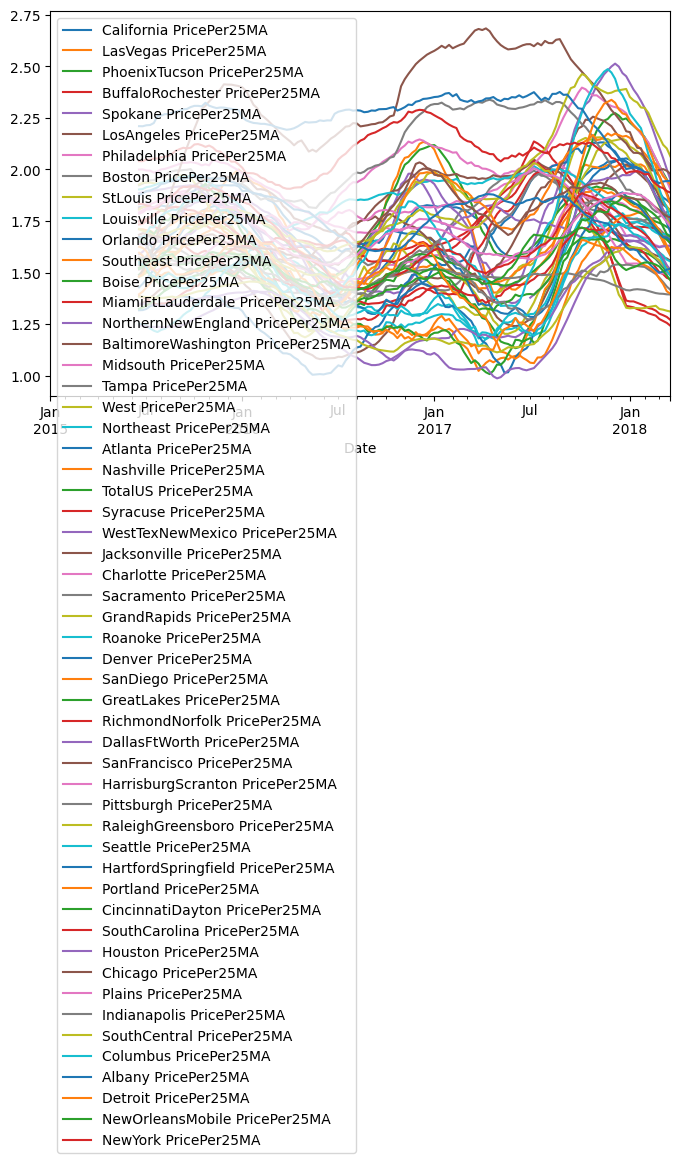

In [102]:
graph_df.plot(figsize=(8, 5))
# legend is covering the graph, lets remove the legend

In [ ]:
graph_df.plot(figsize=(8, 5), legend=False)
# legend is covering the graph, lets remove the legend